In [3]:

import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the CSV file
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\GOOG_historical_data.csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [3]:
# Remove rows with NaN values from all columns
df_cleaned = df.dropna()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\GOOG_historical_data_cleaned.csv', index=False)

# Load the cleaned data
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\GOOG_historical_data_cleaned.csv')

# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days

# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                                                                                           fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()

# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])

           Close         SMA        RSI      MACD  MACD_Signal  MACD_Hist
200     7.246339    4.493303  63.188127  0.467185     0.392373   0.074812
201     7.300635    4.516318  63.299400  0.479975     0.409893   0.070082
202     6.962901    4.537509  62.125428  0.457585     0.419432   0.038153
203     7.131021    4.560104  62.473618  0.448239     0.425193   0.023046
204     7.036127    4.582084  62.149500  0.428239     0.425802   0.002436
...          ...         ...        ...       ...          ...        ...
5015  174.369995  153.415300  54.312391 -0.034166     1.571016  -1.605182
5016  169.160004  153.567450  53.551292 -1.106693     1.035474  -2.142167
5017  168.679993  153.713350  53.481895 -1.972672     0.433845  -2.406517
5018  171.130005  153.873000  53.789086 -2.433223    -0.139569  -2.293654
5019  171.860001  154.023800  53.880288 -2.708091    -0.653273  -2.054818

[4820 rows x 6 columns]


In [4]:
# Display the first few rows of the DataFrame
print("Historical Data:")
print(df.head())

Historical Data:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [8]:
# Create a Ticker object for GOOG
ticker = yf.Ticker("GOOG")

In [9]:
# Get financial statements
financials = ticker.financials
print("\nFinancials:")
print(financials)


Financials:
                                                        2023-12-31  \
Tax Effect Of Unusual Items                           -286479000.0   
Tax Rate For Calcs                                           0.139   
Normalized EBITDA                                   100032000000.0   
Total Unusual Items                                  -2061000000.0   
Total Unusual Items Excluding Goodwill               -2061000000.0   
Net Income From Continuing Operation Net Minori...   73795000000.0   
Reconciled Depreciation                              11946000000.0   
Reconciled Cost Of Revenue                          133332000000.0   
EBITDA                                               97971000000.0   
EBIT                                                 86025000000.0   
Net Interest Income                                   3557000000.0   
Interest Expense                                       308000000.0   
Interest Income                                       3865000000.0   
Normali

In [10]:
# Get the balance sheet
balance_sheet = ticker.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)


Balance Sheet:
                                                      2023-12-31  \
Treasury Shares Number                                       0.0   
Ordinary Shares Number                             12460000000.0   
Share Issued                                       12460000000.0   
Total Debt                                         28504000000.0   
Tangible Book Value                               254181000000.0   
...                                                          ...   
Allowance For Doubtful Accounts Receivable          -771000000.0   
Gross Accounts Receivable                          48735000000.0   
Cash Cash Equivalents And Short Term Investments  110916000000.0   
Other Short Term Investments                       86868000000.0   
Cash And Cash Equivalents                          24048000000.0   

                                                      2022-12-31  \
Treasury Shares Number                                       NaN   
Ordinary Shares Number         

In [11]:
# Get the cash flow statement
cash_flow = ticker.cashflow
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                    2023-12-31     2022-12-31  \
Free Cash Flow                                   69495000000.0  60010000000.0   
Repurchase Of Capital Stock                     -61504000000.0 -59296000000.0   
Repayment Of Debt                               -11550000000.0 -54068000000.0   
Issuance Of Debt                                 10790000000.0  52872000000.0   
Capital Expenditure                             -32251000000.0 -31485000000.0   
Income Tax Paid Supplemental Data                19164000000.0  18892000000.0   
End Cash Position                                24048000000.0  21879000000.0   
Beginning Cash Position                          21879000000.0  20945000000.0   
Effect Of Exchange Rate Changes                   -421000000.0   -506000000.0   
Changes In Cash                                   2590000000.0   1440000000.0   
Financing Cash Flow                             -72093000000.0 -69757000000.0   
Cash F

In [5]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

In [6]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

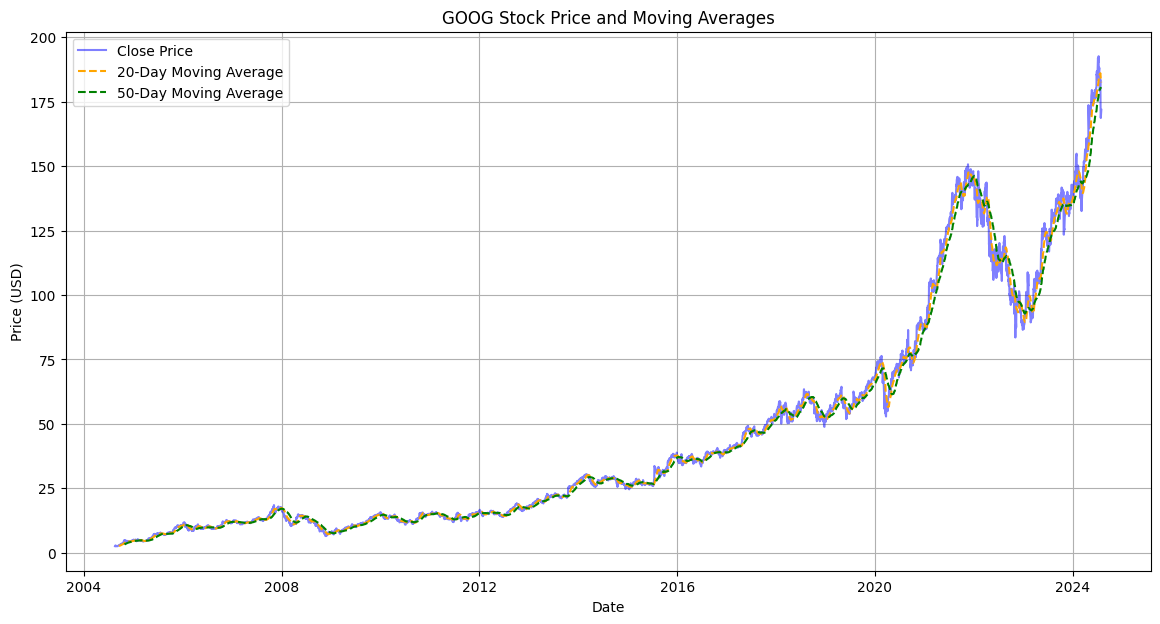

In [7]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['MA50'], label='50-Day Moving Average', color='green', linestyle='--')

plt.title('GOOG Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()